# $$ Prediction Using Bank Marketing Dataset $$

<ins>**Objective**</ins>: The classification goal is to predict if the client will subscribe a term deposit

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
df = pd.read_csv("C:/Users/satya/OneDrive/Desktop/Projects/Python/Datasets/bank_classification.csv", sep=';')

In [4]:
df.head(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,services,married,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
96,42,management,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
97,53,admin.,divorced,university.degree,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
98,37,technician,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.shape

(41188, 21)

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Data Cleaning

In [8]:
df[df.duplicated() == True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [9]:
df.drop_duplicates(keep='first')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

So, there is no null values in the dataset.

# Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [13]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [14]:
# Categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [15]:
# Removing the target variable for separate inspection.
cat_cols= cat_cols.drop('y')
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

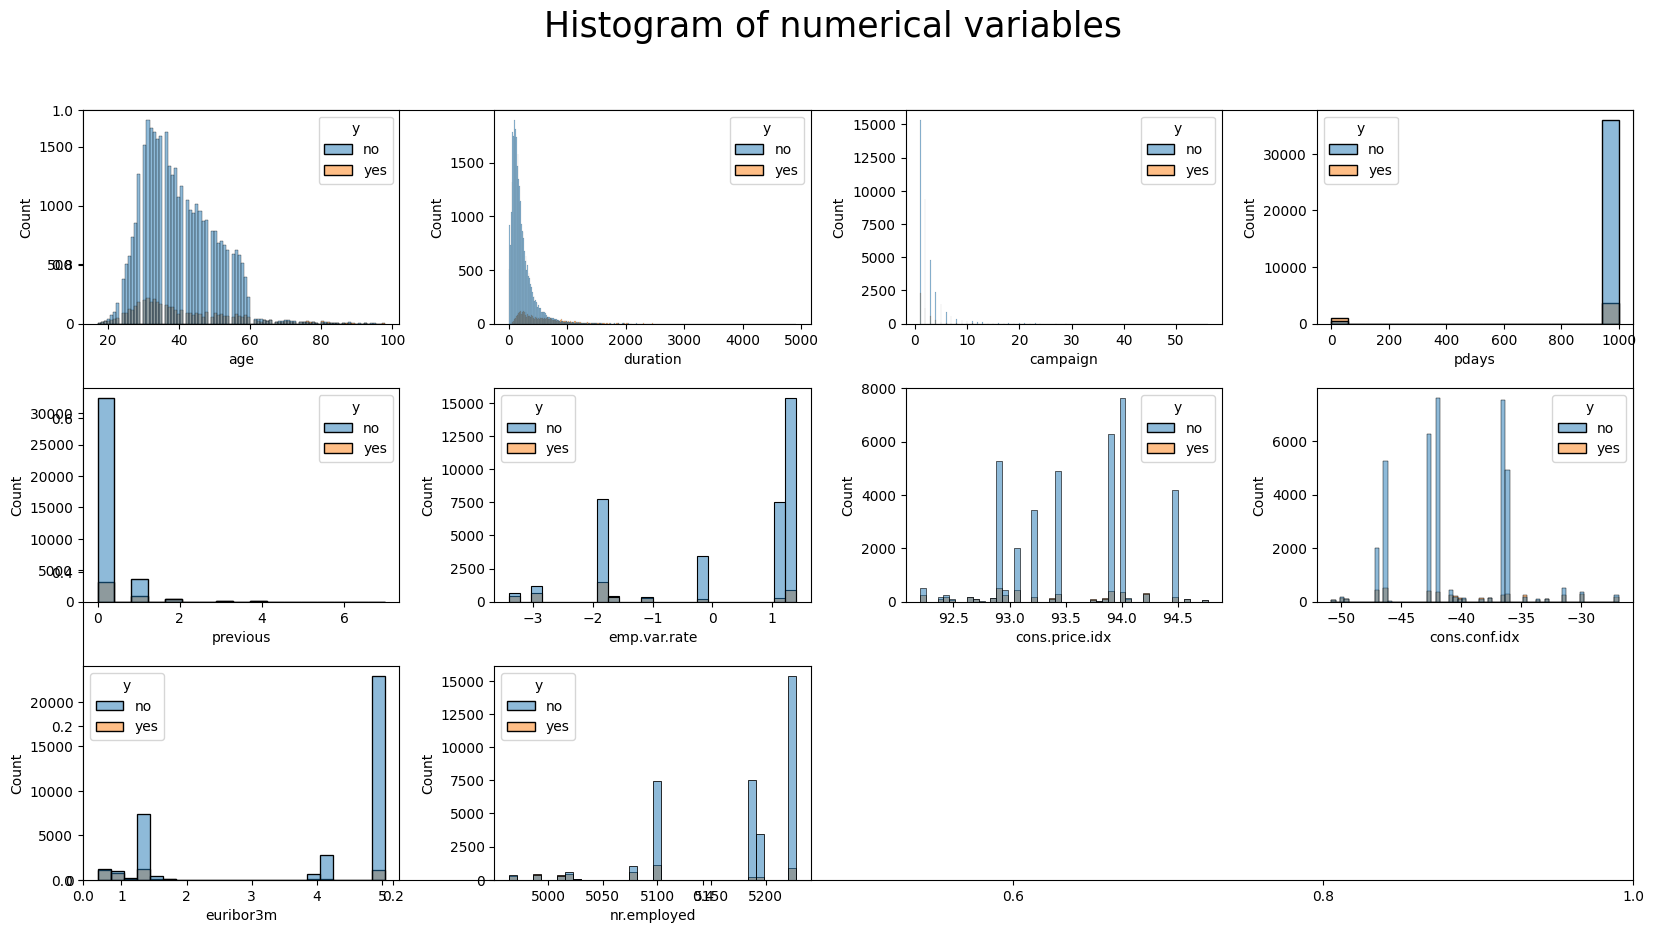

In [16]:
# Creating histograms for numerical variables
count = 1
plt.subplots(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for col in num_cols:
    plt.subplot(3,4,count)
    plot = sns.histplot(x=col, data=df, hue="y")
    plt.xlabel(col)
    count += 1
plt.suptitle("Histogram of numerical variables", size=25)
plt.show()

Nothing much can be said about the data from the histogram as the data seems imbalance. Although one can say that a number of variables(age, duration, campaign, previous) are positively skewed while some others(pdays, nr.employed, euribor3m) are negatively skewed.

In [17]:
# Variance of the numerical variables
for features in num_cols:
    print(features,': ', df[features].var())

age :  108.60245116511788
duration :  67225.72887720143
campaign :  7.6729750278623055
pdays :  34935.68728443465
previous :  0.244927078826095
emp.var.rate :  2.4679145063253203
cons.price.idx :  0.3350558022732152
cons.conf.idx :  21.42021539589864
euribor3m :  3.0083078001952948
nr.employed :  5220.283250397495


In [18]:
# Skewness of the numerical variables
for features in num_cols:
    print(features,': ', df[features].skew())

age :  0.7846968157646645
duration :  3.263141255262832
campaign :  4.762506697067009
pdays :  -4.922189916418162
previous :  3.8320422428611836
emp.var.rate :  -0.7240955492472556
cons.price.idx :  -0.23088765135788006
cons.conf.idx :  0.30317985874819237
euribor3m :  -0.7091879563778298
nr.employed :  -1.044262407089151


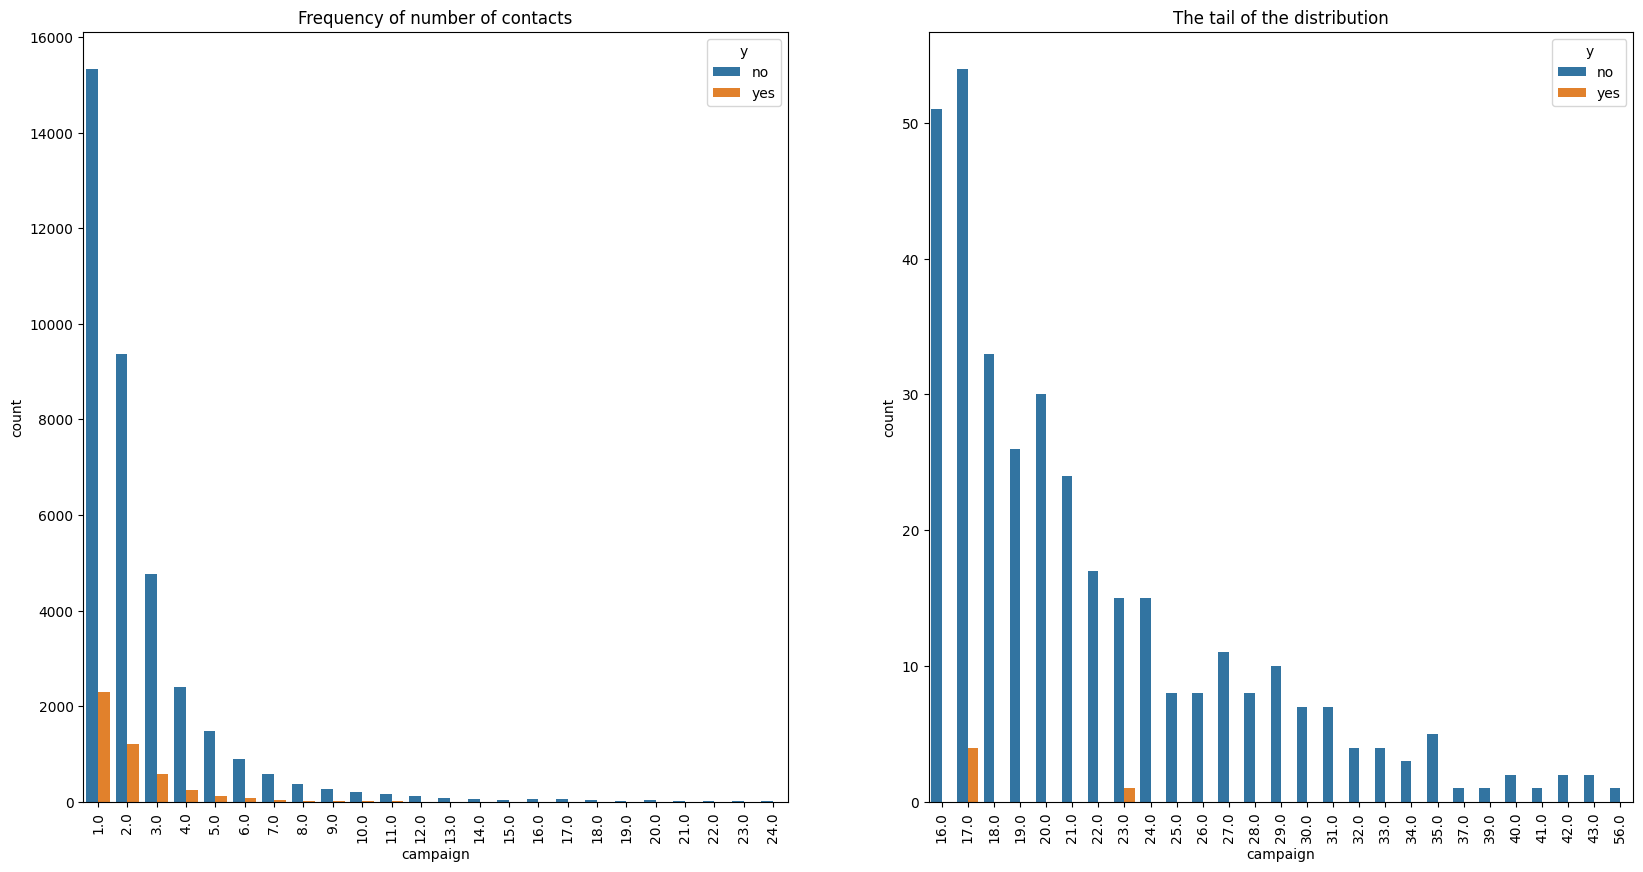

In [19]:
# Boxplot of 
d = df["campaign"]
d1 = d[d<25]
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
plot = sns.countplot(x=d1, data=df, hue="y", ax=axes[0])
axes[0].set_title('Frequency of number of contacts')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

d1 = d[d>15]
plot = sns.countplot(x=d1, data=df, hue="y", ax=axes[1])
axes[1].set_title('The tail of the distribution')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.show()


So, the people who are likely to say yes needs to be contacted less. Also, increase in number of contacts does not seem to do a lot of favour in changing people's mind.

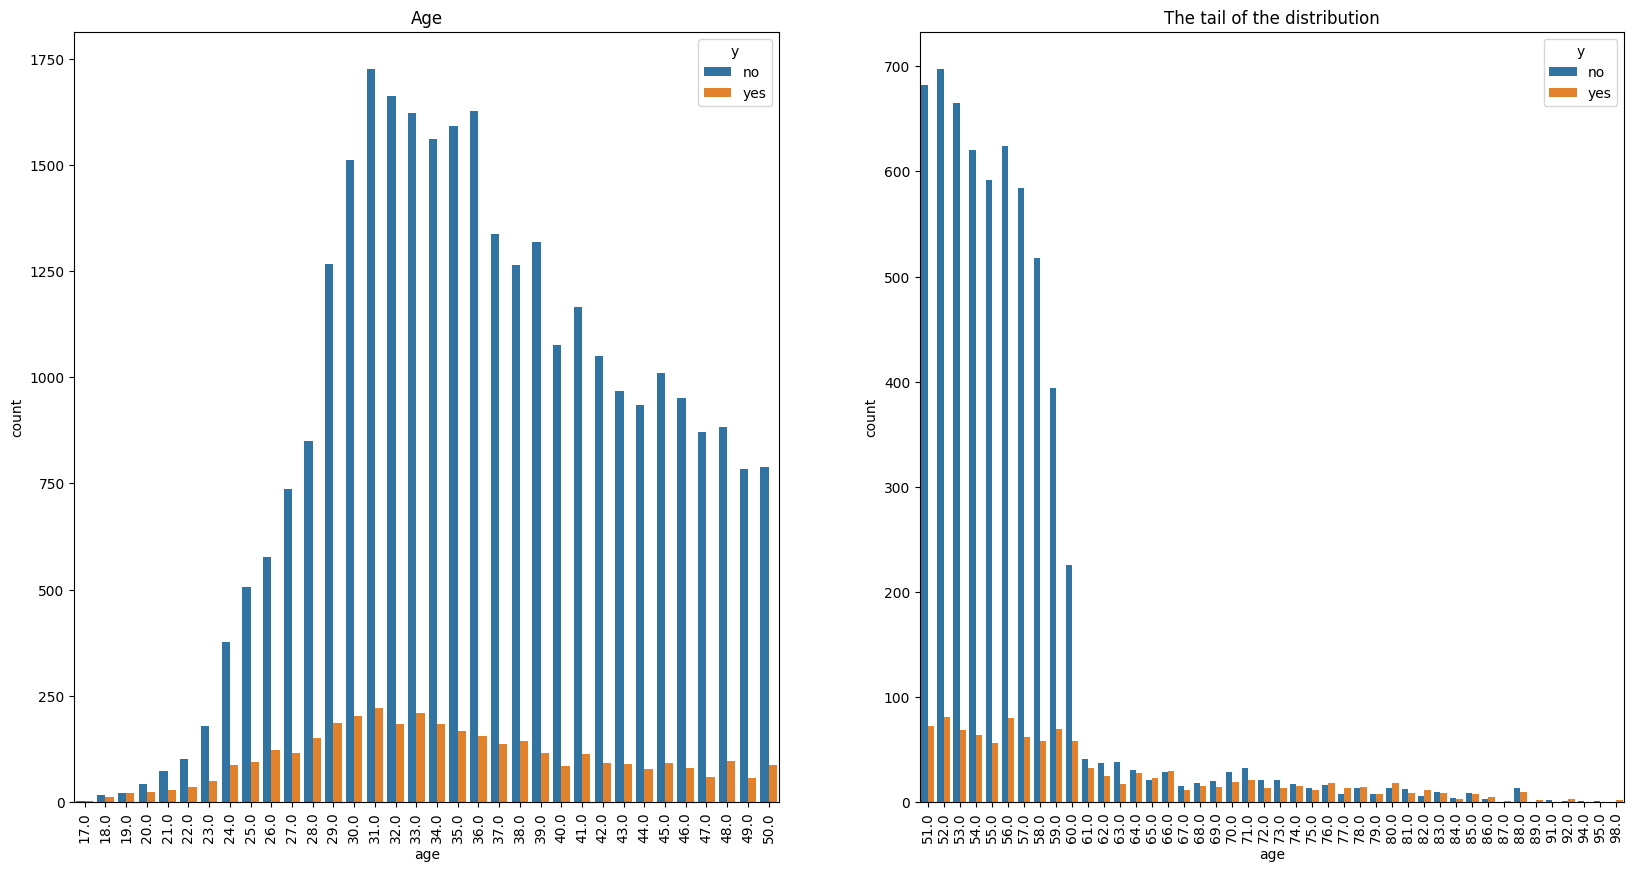

In [20]:
# Boxplot of 
d = df["age"]
d1 = d[d<=50]
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
plot = sns.countplot(x=d1, data=df, hue="y", ax=axes[0])
axes[0].set_title('Age')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


d2 = d[d>50]
plot = sns.countplot(x=d2, data=df, hue="y", ax=axes[1])
axes[1].set_title('The tail of the distribution')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)



plt.show()


It looks like people from all age group are equally likely to say 'yes'. However, this tendency is higher among people in their 30's.

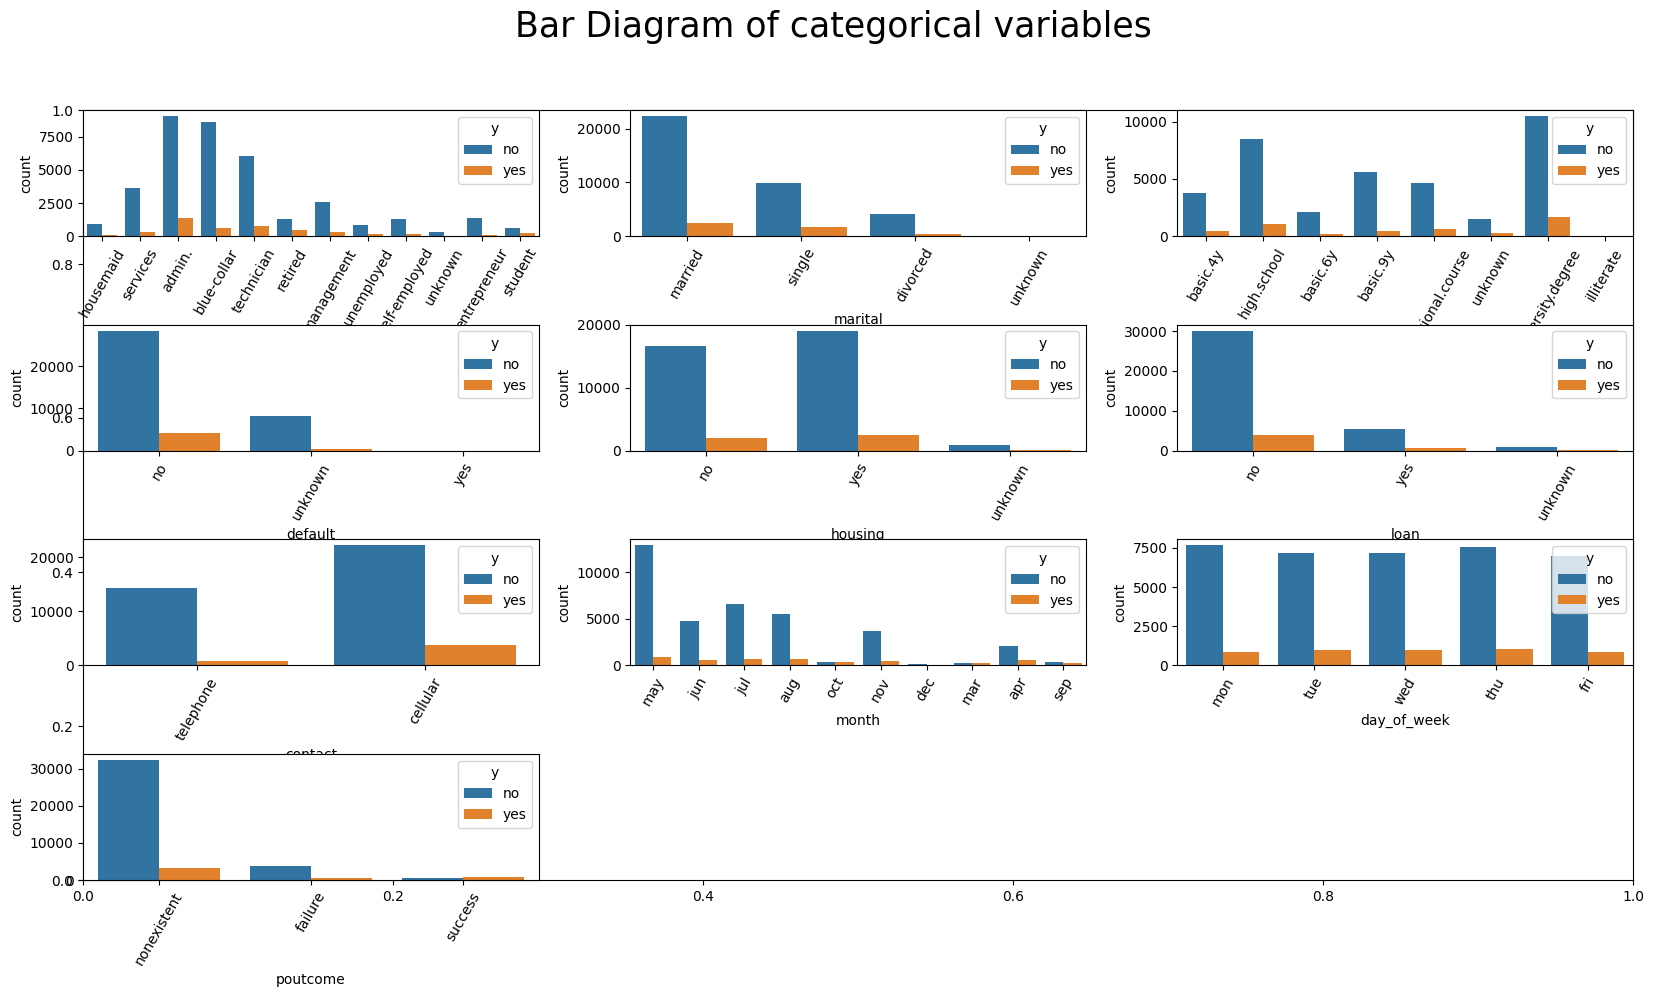

In [21]:
# Bar Diagram 
count = 1
plt.subplots(figsize = (20, 10))
plt.subplots_adjust(wspace=0.2, hspace=0.7)
for col in cat_cols:
    plt.subplot(4, 3, count)
    plot = sns.countplot(x=col, data=df, hue='y')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=60)
    count += 1
plt.suptitle('Bar Diagram of categorical variables', size = 25)
plt.show()

In [22]:
d = pd.DataFrame()
df['y'] = np.where(df['y'] == 'yes', 1, 0)
d = df.groupby('job')['y'].agg(['count', 'sum'])
d['percentage'] = 100 * d['sum'] / d['count']
d.head()

,count,sum,percentage
job,,,
admin.,10422,1352,12.972558
blue-collar,9254,638,6.894316
entrepreneur,1456,124,8.516484
housemaid,1060,106,10.000000
management,2924,328,11.217510


So, the rate of subscribing is highest among the people with job-title: 'admin'.

In [23]:
d = pd.DataFrame()
d = df.groupby('education')['y'].agg(['count', 'sum'])
d['percentage'] = 100 * d['sum'] / d['count']
d.head()

,count,sum,percentage
education,,,
basic.4y,4176,428,10.249042
basic.6y,2292,188,8.202443
basic.9y,6045,473,7.824648
high.school,9515,1031,10.835523
illiterate,18,4,22.222222


The subscription ratio is almost same for people with different highest-education.

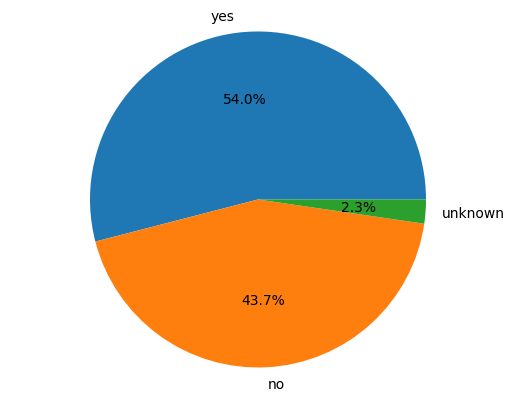

In [24]:
d = df[df['y'] == 1].housing.value_counts()
lbs = list(d.index)
vals = list(d.values)

plt.pie(vals, labels=lbs, autopct="%1.1f%%")


plt.axis("equal")

plt.show()


So, people with housing loans subscribed more to the offer.

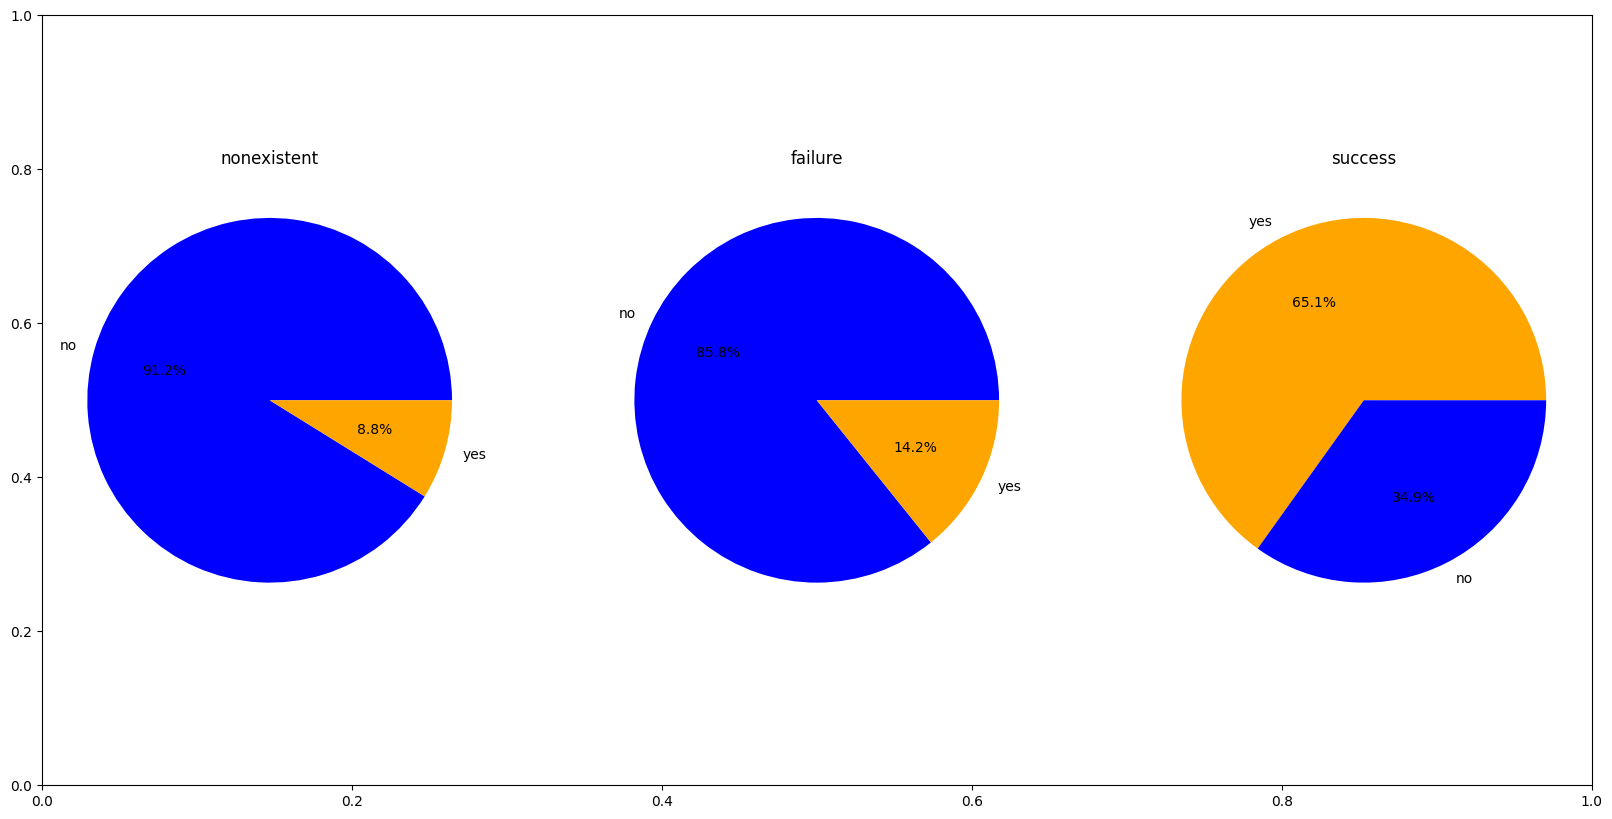

In [25]:
df = pd.read_csv("C:/Users/satya/OneDrive/Desktop/Projects/Python/Datasets/bank_classification.csv", sep=';')
count = 1
plt.subplots(figsize = (20, 10))
plt.subplots_adjust(wspace=0.2, hspace=0.7)
p_type = list(df.poutcome.unique())
col = {'yes':'orange', 'no':'blue'}
for i in p_type:
    plt.subplot(1, 3, count)
    d = df[df['poutcome'] == i].y.value_counts()
    vals = list(d.values)
    lbls = list(d.index)
    plt.pie(vals, labels=lbls, autopct="%1.1f%%", colors=[col[l.lower()]for l in lbls])
    plt.title(i)
    count += 1
    

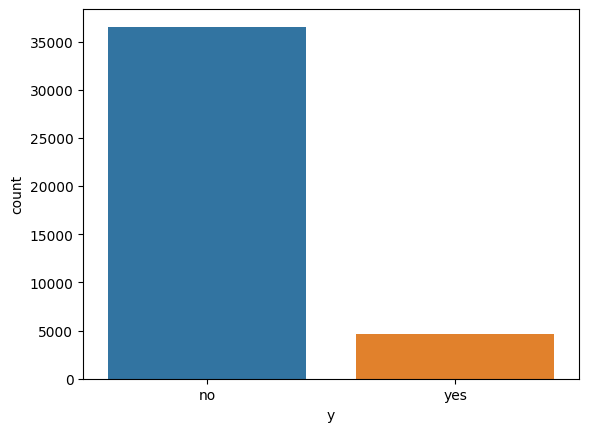

In [26]:
df = pd.read_csv("C:/Users/satya/OneDrive/Desktop/Projects/Python/Datasets/bank_classification.csv", sep=';')
plot = sns.countplot(x='y', data=df, hue='y')

As we can see, the class is highly imbalanced. So, we need to fix it by oversampling/undersampling. In this project, we will use ADASYN, a oversampling technique, to balance the dataset.

In [27]:
df['days']=df["day_of_week"]
df = df.drop("day_of_week", axis = 1)

In [28]:
y = df["y"]
X = df.drop("y", axis = 1)

In [29]:
from imblearn.over_sampling import ADASYN
df = pd.get_dummies(data=df, dtype = int)
df = pd.get_dummies(X)
ada = ADASYN(sampling_strategy="minority", random_state=42)
X1, y1 = ada.fit_resample(df, y)

In [30]:
resampled_df = pd.concat([X1, y1], axis=1)

## ADASYN

In [31]:
# Get a list of columns that were originally one-hot encoded
one_hot_columns = resampled_df.filter(like='_').columns

# Create a new DataFrame to store the original data
df_original = pd.DataFrame()

# Iterate through each original column and reconstruct it from the one-hot encoded columns
for column in resampled_df.columns:
    if column not in one_hot_columns:  # If the column was not one-hot encoded
        df_original[column] = resampled_df[column]  # Add it directly to the original DataFrame
    else:
        original_column_name = column.split('_')[0]  # Get the original column name
        if original_column_name not in df_original.columns:  # Check if the original column is not already added
            cols = [x for x in one_hot_columns if x.split('_')[0] == original_column_name]
            d = resampled_df[cols]
            # Reconstruct the original column from the one-hot encoded columns
            reconstructed_column = d.idxmax(axis=1).str.split('_').str[1]
            df_original[original_column_name] = reconstructed_column

# Now df_original contains the un-encoded data


In [32]:
df_original

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,poutcome,days,y
0,56,261,1,999,0,1.1,93.994000,-36.400000,4.857000,5191.0,...,married,basic.4y,no,no,no,telephone,may,nonexistent,mon,no
1,57,149,1,999,0,1.1,93.994000,-36.400000,4.857000,5191.0,...,married,high.school,unknown,no,no,telephone,may,nonexistent,mon,no
2,37,226,1,999,0,1.1,93.994000,-36.400000,4.857000,5191.0,...,married,high.school,no,yes,no,telephone,may,nonexistent,mon,no
3,40,151,1,999,0,1.1,93.994000,-36.400000,4.857000,5191.0,...,married,basic.6y,no,no,no,telephone,may,nonexistent,mon,no
4,56,307,1,999,0,1.1,93.994000,-36.400000,4.857000,5191.0,...,married,high.school,no,no,yes,telephone,may,nonexistent,mon,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73422,36,455,1,999,0,-1.1,94.403352,-42.285003,0.932606,4963.6,...,married,professional.course,no,no,no,cellular,nov,nonexistent,fri,yes
73423,44,440,1,999,0,-1.1,94.729905,-50.509497,1.015486,4963.6,...,married,high.school,no,no,no,cellular,nov,failure,fri,yes
73424,40,447,1,999,0,-1.1,94.610174,-47.127839,0.986861,4963.6,...,married,professional.course,no,no,no,cellular,nov,nonexistent,fri,yes
73425,39,451,1,999,0,-1.1,94.519270,-44.999270,0.963014,4963.6,...,married,professional.course,no,no,no,cellular,nov,nonexistent,fri,yes


<Axes: xlabel='y', ylabel='count'>

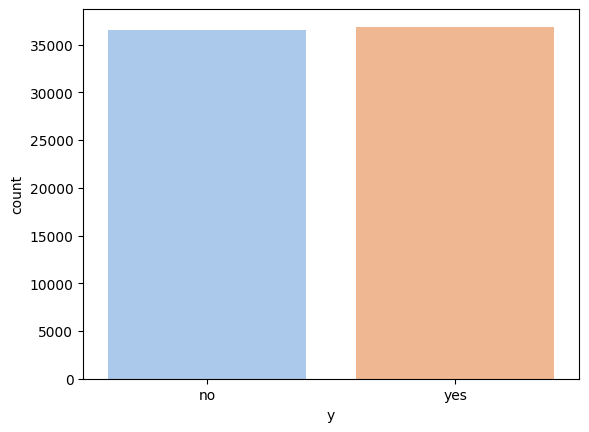

In [33]:
sns.countplot(data=df_original, x='y', palette="pastel")


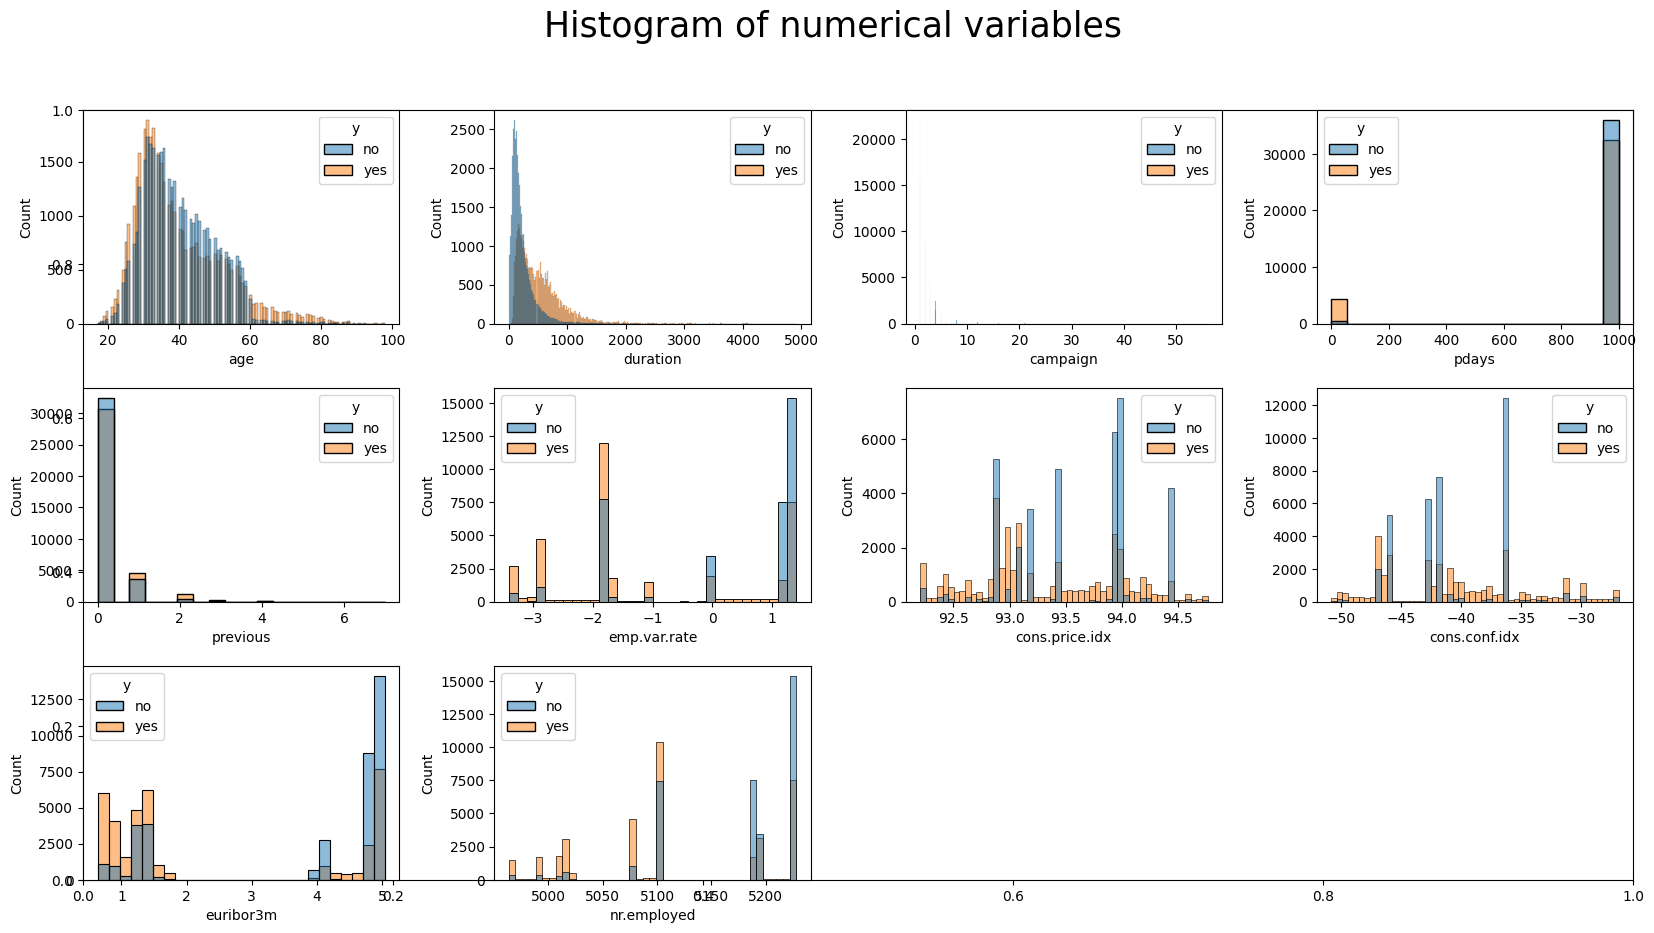

In [34]:
# Creating histograms for numerical variables
count = 1
plt.subplots(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for col in num_cols:
    plt.subplot(3,4,count)
    plot = sns.histplot(x=col, data=df_original, hue="y")
    plt.xlabel(col)
    count += 1
plt.suptitle("Histogram of numerical variables", size=25)
plt.show()

In [35]:
# Variance of the numerical variables
for features in num_cols:
    print(features,': ', df_original[features].var(), ': ', df[features].var())


age :  125.66351197127157 :  108.60245116511788
duration :  116560.93958915996 :  67225.72887720143
campaign :  5.138698121450499 :  7.6729750278623055
pdays :  62187.06260481457 :  34935.68728443465
previous :  0.24983020053105548 :  0.244927078826095
emp.var.rate :  2.91547909844986 :  2.4679145063253203
cons.price.idx :  0.3716548810324619 :  0.3350558022732152
cons.conf.idx :  27.15300980664414 :  21.42021539589864
euribor3m :  3.4513296051412063 :  3.0083078001952948
nr.employed :  6613.773880494447 :  5220.283250397495


In [36]:
# Skewness of the numerical variables
for features in num_cols:
    print(features,': ',df_original[features].skew(),  ': ',df[features].skew())

age :  0.9290417892085947 :  0.7846968157646645
duration :  2.4094615797785623 :  3.263141255262832
campaign :  5.429875713386542 :  4.762506697067009
pdays :  -3.446332652365616 :  -4.922189916418162
previous :  3.5822356721370197 :  3.8320422428611836
emp.var.rate :  -0.21072236786056897 :  -0.7240955492472556
cons.price.idx :  -0.051757075308354356 :  -0.23088765135788006
cons.conf.idx :  0.37823601007839897 :  0.30317985874819237
euribor3m :  -0.12220604321244707 :  -0.7091879563778298
nr.employed :  -0.5228414755562628 :  -1.044262407089151


In [37]:
# Creating list of categorical values
cat_cols = df_original.select_dtypes(include=["object", "bool"]).columns
cat_cols


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'days', 'y'],
      dtype='object')

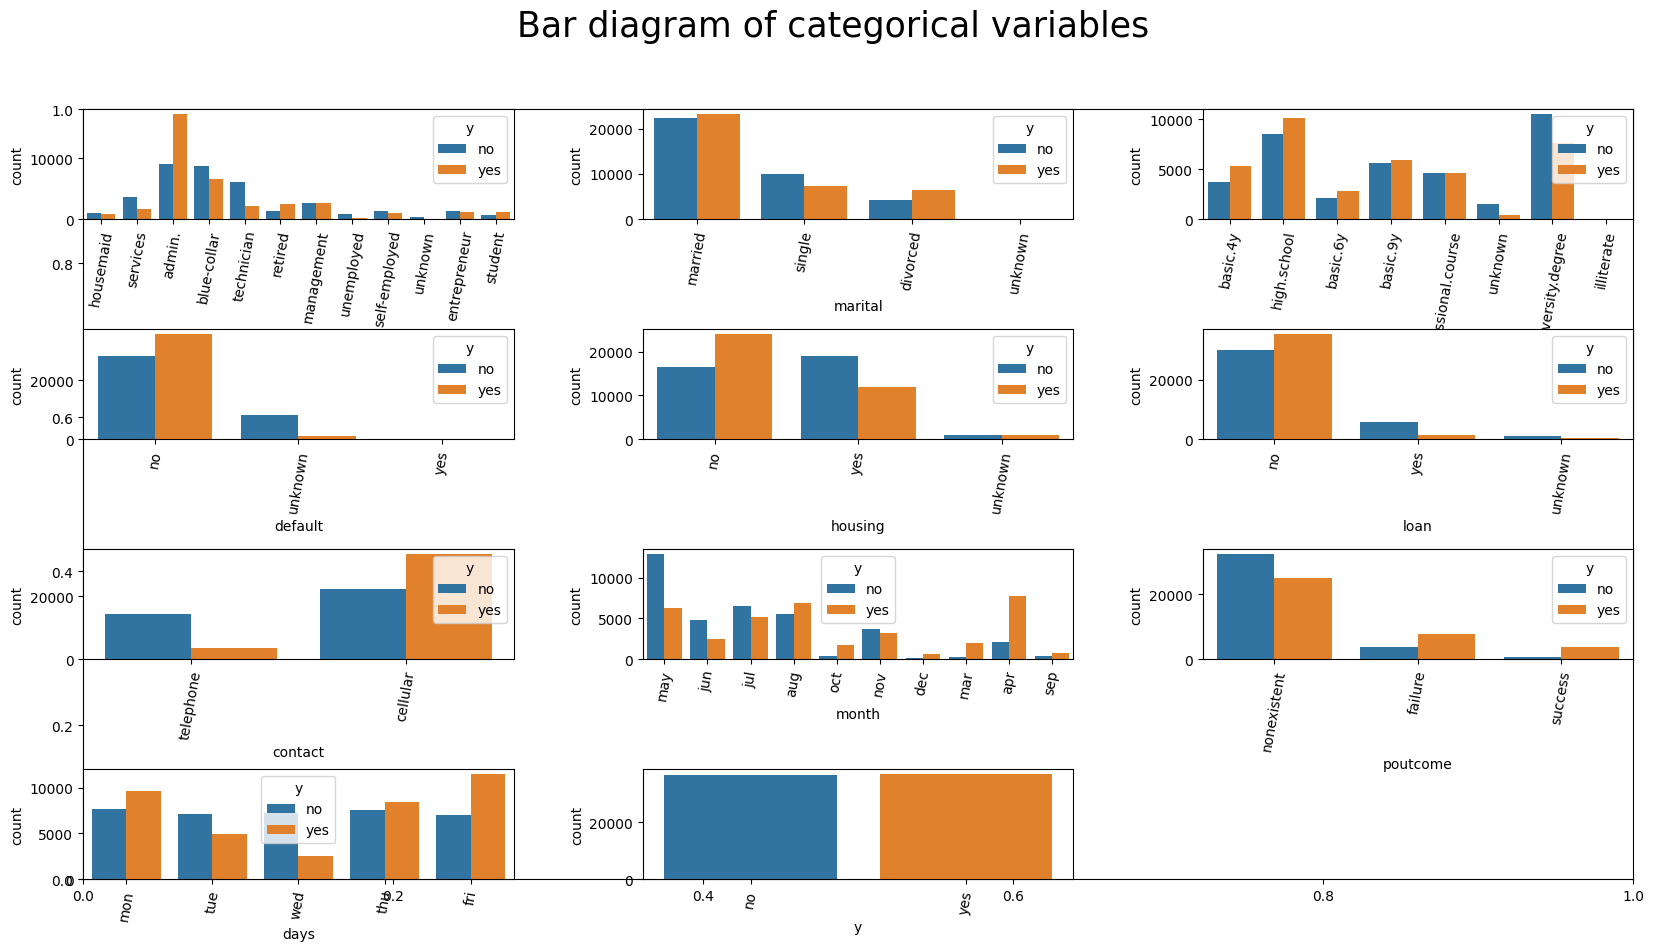

In [38]:
# Creating barchart for categorical variables
count = 1

plt.subplots(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=1)
for col in cat_cols:
    plt.subplot(4,3,count)
    plot = sns.countplot(x=col, data=df_original, hue="y")
    plot.set_xticklabels(plot.get_xticklabels(), rotation=80)
    count += 1
plt.suptitle("Bar diagram of categorical variables", size=25)
plt.show()

So, the yes values are scaled up but the distribution remained almost same in case of the numerical variables.

In [39]:
df = pd.get_dummies(data=df_original, columns = cat_cols, dtype = int)

<Axes: >

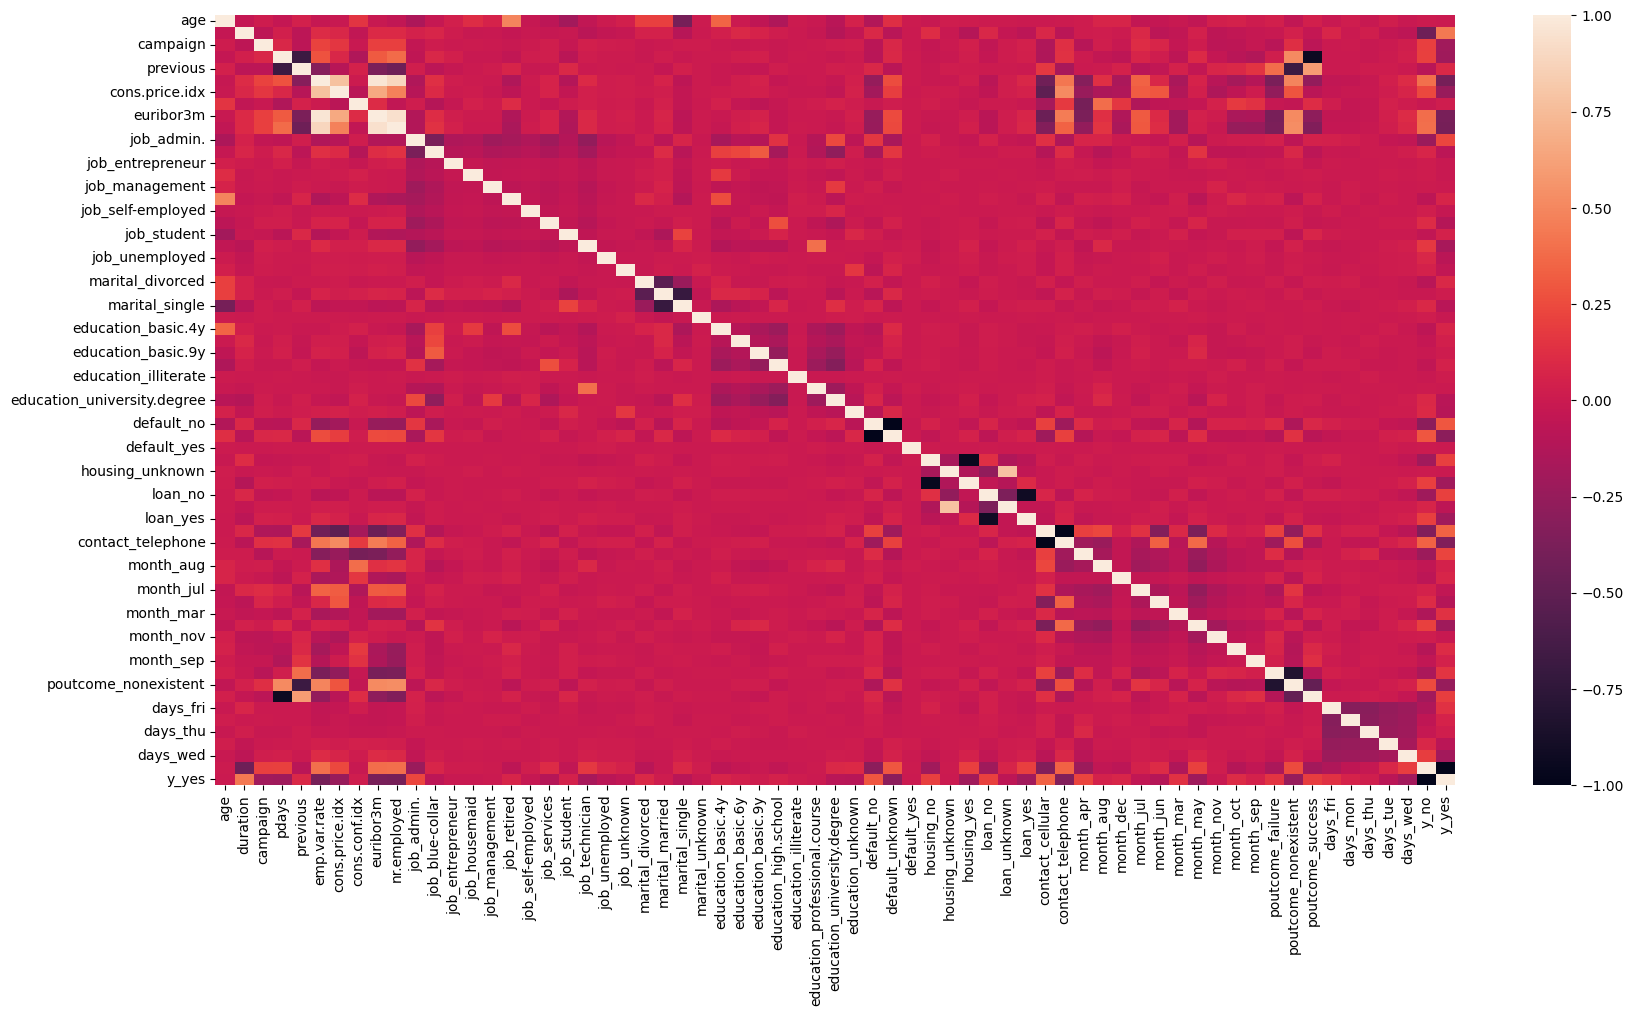

In [40]:
# Correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr())

In [41]:
# high correlation features
high_corr = []
cols = list(df.columns)
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        if abs(df[cols[i]].corr(df[cols[j]]))> 0.8:
            high_corr.append((cols[i], cols[j]))

In [42]:
high_corr

[('pdays', 'poutcome_success'),
 ('emp.var.rate', 'euribor3m'),
 ('emp.var.rate', 'nr.employed'),
 ('euribor3m', 'nr.employed'),
 ('default_no', 'default_unknown'),
 ('housing_no', 'housing_yes'),
 ('loan_no', 'loan_yes'),
 ('contact_cellular', 'contact_telephone'),
 ('poutcome_failure', 'poutcome_nonexistent'),
 ('y_no', 'y_yes')]

In [43]:
df.drop(['job_unknown', 'marital_divorced', 'education_unknown', 'default_unknown', 'housing_unknown', 'loan_unknown', 'contact_telephone', 'month_sep',  'poutcome_nonexistent', 'y_no', 'pdays', 'euribor3m', 'nr.employed'], axis = 1, inplace=True)

In [44]:
# ADASYN
from collections import Counter
from imblearn.over_sampling import ADASYN

In [45]:
y = df['y_yes']
X = df.drop('y_yes', axis=1)

In [46]:

X_resampled, y_resampled = X1, y1


In [47]:
y_resampled

0         no
1         no
2         no
3         no
4         no
        ... 
73422    yes
73423    yes
73424    yes
73425    yes
73426    yes
Name: y, Length: 73427, dtype: object

# Model Fitting.

As this is a classification problem, we can fit a decision tree or logistic regression etc. In this project we will fit a decision tree.

## Decision Tree

Now, for creating a model, we will first fit a simple decision tree. But before fitting, we need to split the dataset. We will split it in the ratio 7:3. So, 70% of the data will be used for training and the remaining 30% for testing.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size = 0.2, random_state=23)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier(max_depth=5)

In [52]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [53]:
dt.score(X_test, y_test)

0.886286259022198

              precision    recall  f1-score   support

          no       0.96      0.80      0.88      7315
         yes       0.83      0.97      0.90      7371

    accuracy                           0.89     14686
   macro avg       0.90      0.89      0.89     14686
weighted avg       0.90      0.89      0.89     14686



<Axes: >

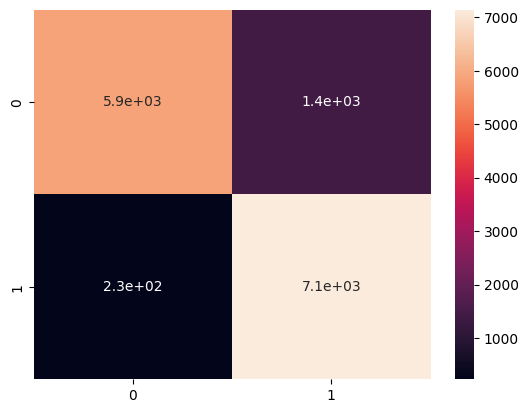

In [54]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, dt.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test)), annot=True)

Since, we are predicting if a customer will subscribe a term deposit or not, we want a lower false-negative.So, a higher recall value is desirable. The above model has a recall value of 0.89. We will try to improve this by hyper-parameter tuning.

### Hyper-parameter tuning

In [55]:
# Hyper-parameter tuning using Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    "max_depth" : np.random.randint(1,10, 10),
    "min_samples_split" : np.random.randint(2,20, 10),
    "min_samples_leaf" : np.random.randint(1,20, 10),
    "criterion" : ["gini", "entropy"]
}
dt = DecisionTreeClassifier()
random_search = RandomizedSearchCV(dt, param_dist, n_iter=100, cv=5)
random_search.fit(X_train, y_train)
best = random_search.best_params_
best

{'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 9,
 'criterion': 'entropy'}

So, these are the best parameters for the Decision Tree to be fitted.

In [56]:
random_search.score(X_test, y_test)

0.9161786735666622

In [57]:
# fitting a model based on the best parameters
random_search_tree = DecisionTreeClassifier(**best)
random_search_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=4)

              precision    recall  f1-score   support

          no       0.94      0.88      0.91      7315
         yes       0.89      0.95      0.92      7371

    accuracy                           0.92     14686
   macro avg       0.92      0.92      0.92     14686
weighted avg       0.92      0.92      0.92     14686



<Axes: >

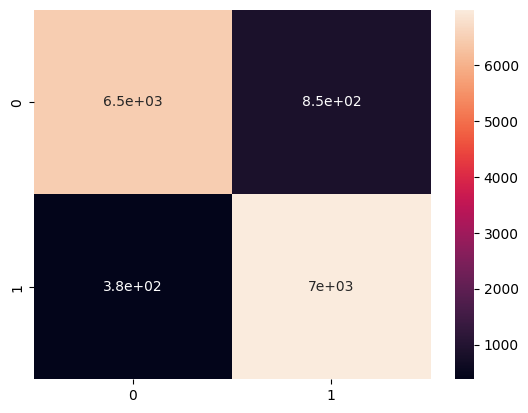

In [58]:
print(classification_report(y_test, random_search.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, random_search.predict(X_test)), annot=True)

The recall value jumped to 0.92. Now, let's use random forest and try to improve the model further.

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
# Fitting random forest model
rand_forest = RandomForestClassifier(random_state=25, n_estimators=500, max_features='log2')
rand_forest.fit(X_train, y_train)


RandomForestClassifier(max_features='log2', n_estimators=500, random_state=25)

In [61]:
# Obtaining accuracy of this model on the test data
rand_forest.score(X_test, y_test)

0.9560806209995915

              precision    recall  f1-score   support

          no       0.95      0.96      0.96      7315
         yes       0.96      0.95      0.96      7371

    accuracy                           0.96     14686
   macro avg       0.96      0.96      0.96     14686
weighted avg       0.96      0.96      0.96     14686



<Axes: >

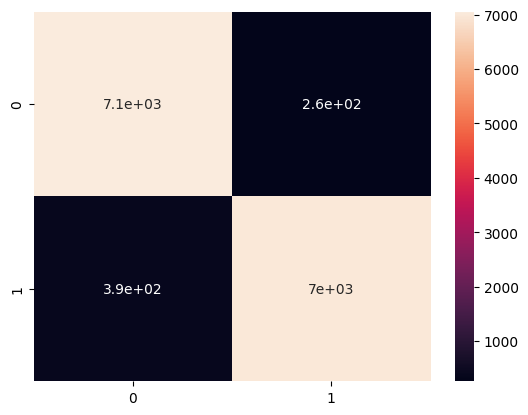

In [62]:
print(classification_report(y_test, rand_forest.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, rand_forest.predict(X_test)), annot=True)

The recall value of the simple Random Forest model is 0.96. Let's see if we can improve the score by feature selection

### Feature Importance

In [63]:
# Feature importance
feature_names = X_train.columns
feature_importance = rand_forest.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
for i,index in enumerate(sorted_indices):
    print(f"{i+1}. {feature_names[index]}: {feature_importance[index]}")

1. duration: 0.21369608479952318
2. euribor3m: 0.07163985031518784
3. nr.employed: 0.051224998350924346
4. cons.conf.idx: 0.042532663814347005
5. cons.price.idx: 0.042317899635938
6. emp.var.rate: 0.03956974275102478
7. housing_no: 0.0319241962584242
8. housing_yes: 0.031421593615747624
9. age: 0.02999994014262403
10. contact_cellular: 0.026926507663749516
11. education_university.degree: 0.02544943893852755
12. default_no: 0.02258177779127295
13. marital_married: 0.017723823596214973
14. campaign: 0.017570962173909528
15. marital_single: 0.01692768458949058
16. job_admin.: 0.014764192701694578
17. loan_no: 0.013572645680708834
18. days_wed: 0.013271925004326245
19. education_high.school: 0.013024624173643326
20. default_unknown: 0.012396003270193528
21. days_thu: 0.012218478079335978
22. days_tue: 0.011888108239957621
23. month_oct: 0.011764371621586103
24. month_apr: 0.011471357329032332
25. contact_telephone: 0.010964820600078204
26. days_fri: 0.010575921263984033
27. loan_yes: 0.01

Let's remove the features whose importance score is less than 0.02.

In [64]:
# dropping the variables with importance < 0.02
discard = []
for i,index in enumerate(sorted_indices):
    if feature_importance[index] < 0.02:
        discard.append(feature_names[index])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y,test_size = 0.2, random_state=23)

In [66]:
X_train = X_train.drop(discard, axis=1)

In [67]:
X_test = X_test.drop(discard, axis=1)

In [68]:
# Fitting random forest model
rand_forest = RandomForestClassifier(random_state=25, n_estimators=500, max_features='log2')
rand_forest.fit(X_train, y_train)


RandomForestClassifier(max_features='log2', n_estimators=500, random_state=25)

In [69]:
# Obtaining accuracy of this model on the test data
rand_forest.score(X_test, y_test)

0.9482500340460303

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7315
           1       0.94      0.96      0.95      7371

    accuracy                           0.95     14686
   macro avg       0.95      0.95      0.95     14686
weighted avg       0.95      0.95      0.95     14686



<Axes: >

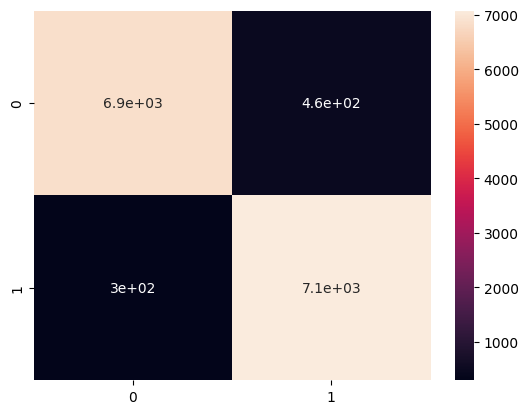

In [70]:
print(classification_report(y_test, rand_forest.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, rand_forest.predict(X_test)), annot=True)

The recall score decreased. So, we will use the previous random forest model as our final predictor.

# Conclusion

In this project, we took the  "Bank Marketing Data Set" from the UCI Machine Learning Repository which is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. First, we cleaned the data and removed duplicates from it. Then we did exploratory data analysis to understand different features and get idea about their effects on the response. We saw that the data is imbalanced and so we applied 'ADASYN', an oversampling technique to balance it. The distribution of samples remained same, just sacled up. 
Next, we fitted a **Decision Tree** and **Random Forest** and found that the recall value of the Random forest was better. So, this can be used for prediction in future. 